# This project analyses and visualizes a Global Food Price Dataset
## Link to the dataset: https://www.kaggle.com/datasets/lasaljaywardena/global-food-prices-dataset?resource=download

In [127]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [103]:
df = pd.read_csv("Data Science Projects\global_food_prices.csv", dtype = {'adm1_id': int,
                                                                          "adm0_id": int,
                                                                          "adm0_name": str, 
                                                                          "mkt_name": str, 
                                                                          "pt_id": int,
                                                                          "cm_name": str,
                                                                          "mp_price": float,
                                                                          "adm1_name": str                                                               
                                                                         })

In [104]:
df2 = df[["adm0_name", "cm_name", "um_name", "cur_name", "mp_month", "mp_year", "mp_price", "mkt_name"]]

df2 = df2.rename(columns={"adm0_name": "Country", 
                   "cm_name": "Food Item", 
                   "um_name": "Units", 
                   "cur_name": "Currency", 
                   "mp_month": "Month", 
                   "mp_year": "Year",
                   "mp_price": "Price",
                   "mkt_name": "Market"
                  })

In [105]:
# df2['Food Item'] = df2['Food Item'].replace(['- Retail', '- Wholesale'], ' ')
# df2.head()


df2['Food'] = df2['Food Item'].str.replace('- Retail', ' ')
df2["Food Item"] = df2["Food"]
df2['Food'] = df2['Food Item'].str.replace('- Wholesale', ' ')

#### Lookup function

In [106]:
# df2[df2['Food'].str.contains("Wholesale")]

In [107]:
df2.drop(columns = "Food Item", inplace = True)

#### Filtering for a specific country

In [108]:
# Honduras = df2[df2['Country'].str.contains("Honduras")]

#### Converting Month and Year to Datetime format

In [109]:
df2["Date"] = pd.to_datetime(df2['Year'].astype(str)  + df2['Month'].astype(str), format='%Y%m')
df2.drop(columns = {'Month', 'Year'}, inplace = True)

#### Data for each country from beginning of each year

In [110]:
# filter by single day
# df_filtered = df[df['date'].dt.strftime('%Y-%m-%d') == '2014-01-01']

# filter by single month
# df_filtered = df[df['date'].dt.strftime('%Y-%m') == '2014-01']

# filter by single year
# df_filtered = df[df['date'].dt.strftime('%Y') == '2014']

In [111]:
# df2[df2['Date'].dt.strftime('%m') == '01']
# df2["Quarter"] = df2["Date"].dt.quarter
df2[df2['Date'].dt.strftime('%m') == '01']

,Country,Units,Currency,Price,Market,Food,Date
0,Afghanistan,KG,AFN,50.0000,Fayzabad,Bread,2014-01-01
12,Afghanistan,KG,AFN,50.0000,Fayzabad,Bread,2015-01-01
22,Afghanistan,KG,AFN,55.5000,Fayzabad,Bread,2016-01-01
33,Afghanistan,KG,AFN,50.0000,Fayzabad,Bread,2017-01-01
45,Afghanistan,KG,AFN,50.0000,Fayzabad,Bread,2018-01-01
...,...,...,...,...,...,...,...
2050499,Zimbabwe,KG,ZWL,235.5555,Torwood 2,Beans (sugar),2021-01-01
2050506,Zimbabwe,100 ML,ZWL,103.3333,Torwood 2,Toothpaste,2021-01-01
2050513,Zimbabwe,KG,ZWL,113.3333,Torwood 2,Laundry soap,2021-01-01
2050520,Zimbabwe,250 G,ZWL,59.1667,Torwood 2,Handwash soap,2021-01-01


# Analysis of food price patterns in one specific country and for one food item:
## 2 types of analysis were conducted for Afghanistan's Bread Prices:
### 1) Market Analysis (Prices throughout the 21st century of food prices for different markets)

In [112]:
AfghanBread = df2[(df2["Country"] == 'Afghanistan') & (df2['Food'].str.contains('Bread'))]
# AfghanBread.head(50)
# AfghanBread.to_csv('Afbr', sep='\t')
# AFBR.to_excel('Afbr2.xlsx')

In [113]:
AFBR = AfghanBread.sort_values(["Market", "Date"], ascending=True, ignore_index=True)
AFBR = AFBR[AFBR['Date'].dt.strftime('%Y-%m-%d') == '2021-01-01']
# AFBR.head(60)
# AFBR.to_excel('Afbr3.xlsx')

## Price of Bread in Afghanistan across different markets in the beginning of 2021 

- A large majority of markets share similar prices with the median remaining around 50 AFN
- There is a large range in prices with the cheapest Market selling Bread at less than half the price of the most expensive market

### A more dynamic chart is available in the PowerBI File

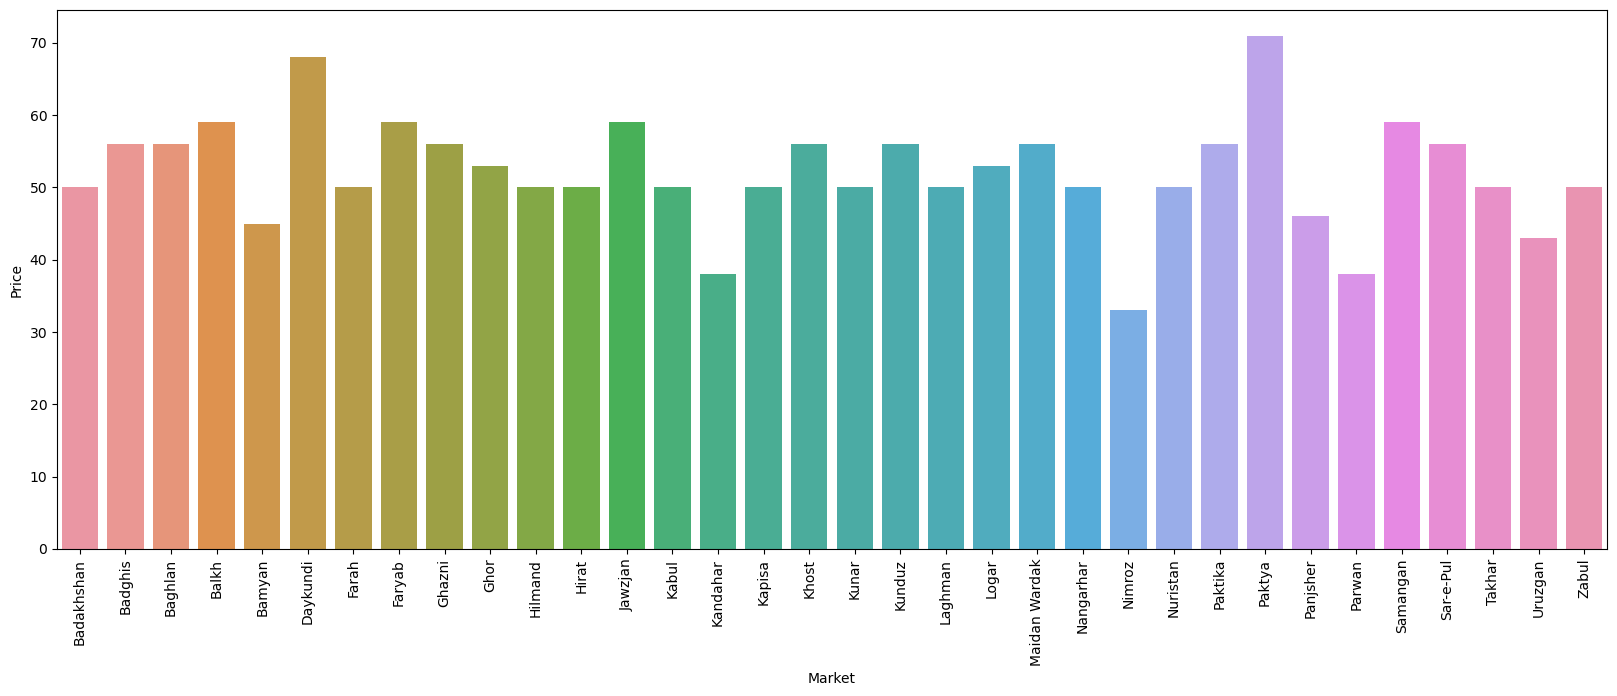

In [114]:
plt.figure(figsize=(20,7))
sns.barplot(data=AFBR, x = 'Market', y = 'Price');
plt.xticks(rotation=90);
plt.legend([],[], frameon=False);

### 2) Country Analysis (Food Prices averaged across all markets and analysed throughout the years)

In [115]:
AFBR_Mean = AFBR.groupby('Date')['Price'].mean() 
# Groupby one column and return the mean of only particular column in the group.
AFBR_Mean.head()
# AFBR_Mean.to_excel('Afbr4.xlsx')


Date
2021-01-01    52.117647
Name: Price, dtype: float64

In [116]:
bread = df2[df2['Food'].str.contains('Bread')]
bread

,Country,Units,Currency,Price,Market,Food,Date
0,Afghanistan,KG,AFN,50.0000,Fayzabad,Bread,2014-01-01
1,Afghanistan,KG,AFN,50.0000,Fayzabad,Bread,2014-02-01
2,Afghanistan,KG,AFN,50.0000,Fayzabad,Bread,2014-03-01
3,Afghanistan,KG,AFN,50.0000,Fayzabad,Bread,2014-04-01
4,Afghanistan,KG,AFN,50.0000,Fayzabad,Bread,2014-05-01
...,...,...,...,...,...,...,...
1913698,Ukraine,Loaf,UAH,14.1500,Zhytomyr,Bread (wheat),2017-07-01
1913699,Ukraine,Loaf,UAH,14.9100,Zhytomyr,Bread (wheat),2017-09-01
1913700,Ukraine,Loaf,UAH,14.9967,Zhytomyr,Bread (wheat),2017-10-01
1913701,Ukraine,Loaf,UAH,15.7900,Zhytomyr,Bread (wheat),2017-11-01


## Price of Bread in Afghanistan across the 21st Century

- Prices greatly increase from November 2007 to July 2008 resulting in over a **110% price increase**, this could be due to the great recession that began in late 2007  
- Prices increased by another 10% during the start of the covid pandemic in 2020

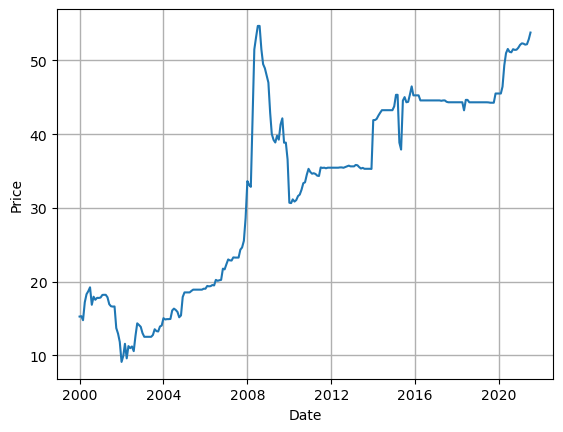

In [121]:
zbr = bread[bread['Country'].str.contains('Afghanistan')]
zbr2 = zbr.groupby(['Country', 'Date']).mean(numeric_only=True)
plt.grid(linewidth=1)
sns.lineplot(data=zbr2, x = 'Date', y = 'Price');

## Similar Analysis can be done for each country simply by replacing the country name with any of the following below

In [118]:
bread['Country'].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Belarus', 'Bolivia', 'Congo', 'Djibouti', 'Gambia', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Iraq', 'Jordan', 'Kenya', 'Kyrgyzstan',
       'Lebanon', 'Lesotho', 'Libya', 'Namibia', 'Nicaragua', 'Nigeria',
       'Panama', 'Peru', 'State of Palestine', 'Swaziland',
       'Syrian Arab Republic', 'Tajikistan', 'Turkey', 'Ukraine'],
      dtype=object)

### A more dynamic chart with data of all the above mentioned countries is available in the PowerBI File